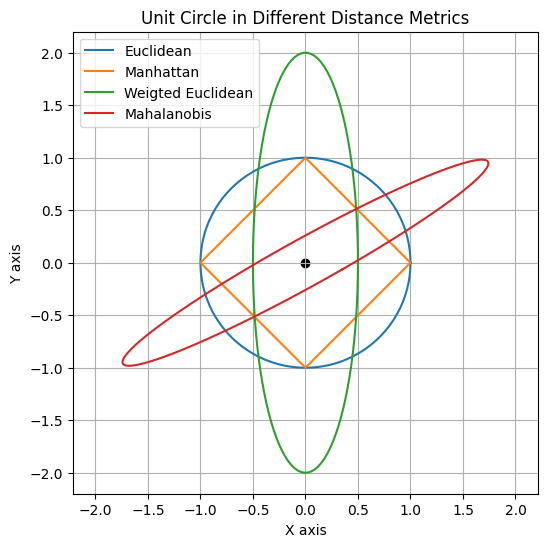

In [60]:
# Q1
import numpy as np
import matplotlib.pyplot as plt

# Generate an array of angles from 0 to 2π
angles = np.linspace(0, 2 * np.pi, 100)

# Calculate x and y coordinates of points on the unit circle
euclidean_x = np.cos(angles)
euclidean_y = np.sin(angles)
manhattan_x = np.array([-1, 0, 1, 0, -1])
manhattan_y = np.array([0, 1, 0, -1, 0])
weight_x = 4
weight_y = 0.25
w_eucl_x = np.sqrt(1/weight_x) * np.cos(angles)
w_eucl_y = np.sqrt(1/weight_y) * np.sin(angles)


cov = np.array([[1.0,5],[0.5,3]])
inv_cov = np.linalg.inv(cov)
eigenvalues, eigenvectors = np.linalg.eig(inv_cov)
mahala_x = np.sqrt(1 / eigenvalues[0]) * np.cos(angles)
mahala_y = np.sqrt(1 / eigenvalues[1]) * np.sin(angles)
mahala_points = np.array([mahala_x, mahala_y]).T
# Rotate the points by the eigenvectors
rotated_points = mahala_points @ eigenvectors.T

# Plot the unit circle
plt.figure(figsize=(6,6)) # Make the plot size square
plt.scatter(0,0,color='black')
plt.plot(euclidean_x, euclidean_y, label='Euclidean') # Plot the circle
plt.plot(manhattan_x, manhattan_y, label='Manhattan')
plt.plot(w_eucl_x, w_eucl_y, label="Weigted Euclidean")
plt.plot(rotated_points[:,0], rotated_points[:,1],label="Mahalanobis")
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Unit Circle in Different Distance Metrics')
plt.grid()
plt.legend(loc='upper left')
plt.axis('equal') # Ensure the aspect ratio is equal to make the circle look perfect

# Show the plot
plt.show()

In [61]:
# Q3-1
import numpy as np
import matplotlib.pyplot as plt
X_1 = np.array([[1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1,1,1]]).T
X_2 = np.array([[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]).T
cov = np.array([[2,0,0],[0,2,0],[0,0,2]])
inv_cov = np.linalg.inv(cov)
print(inv_cov)
def euclidean_dist(X_1,X_2):
  # Take the square root of the sum to get the Euclidean distance
  dist_array = np.array([])
  for i in range(len(X_1)):
    dist_array = np.append(dist_array,np.sqrt(np.sum((X_1[i] - X_2[i]) ** 2)))
  return dist_array
def manhanttan_dist(X_1,X_2):
  dist_array = np.array([])
  for i in range(10):
    dist_array = np.append(dist_array,np.sum(np.abs(X_1[i] - X_2[i])))
  return dist_array
def mahalanobis_dist(X_1,X_2):
  dist_array = np.array([])
  for i in range(10):
     dist_array = np.append(dist_array, np.sqrt((X_1[0]-X_2[0].T)@inv_cov@(X_1[0]-X_2[0])))
  return dist_array

print(euclidean_dist(X_1,X_2))
print(manhanttan_dist(X_1,X_2))
print(mahalanobis_dist(X_1,X_2))

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]
[1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[1.22474487 1.22474487 1.22474487 1.22474487 1.22474487 1.22474487
 1.22474487 1.22474487 1.22474487 1.22474487]


In [62]:
#Q3-2
from keras.datasets import mnist
(train_X, train_label), (test_X, test_label) = mnist.load_data()
test_X_reshaped = test_X.reshape(10000, 784)
# X_train, temp_X, y_train, temp_Y = train_test_split(test_X_reshaped, test_label, test_size=0.4, random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(temp_X, temp_Y, test_size=0.5, random_state=42)
import numpy as np

# Assuming X_train is your training data
total_samples = test_X_reshaped.shape[0]

# Calculate indices for splits
index_60 = int(total_samples * 0.6)  # 60% of the data
index_80 = int(total_samples * 0.8)  # 80% of the data (60% + 20%)

# Split the data
X_train = test_X_reshaped[:index_60]        # Top 60%
X_val = test_X_reshaped[index_60:index_80]  # Middle 20%
X_test = test_X_reshaped[index_80:]      # Last 20%

y_train = test_label[:index_60]
y_val = test_label[index_60:index_80]
y_test = test_label[index_80:]

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(X_val))

(6000, 784)
(2000, 784)
(2000, 784)


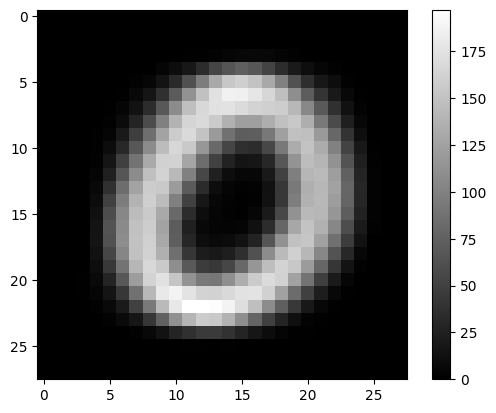

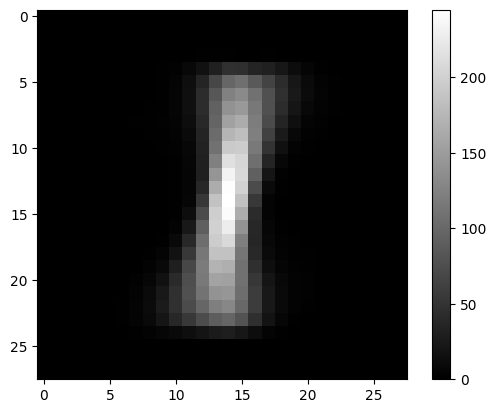

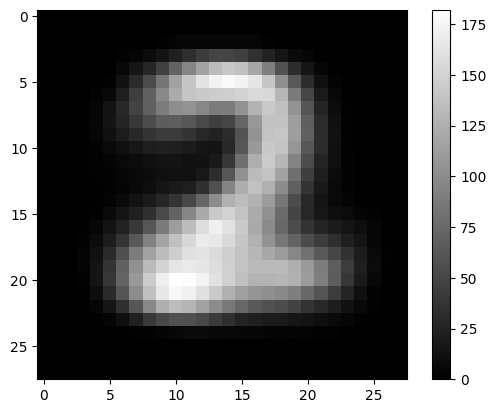

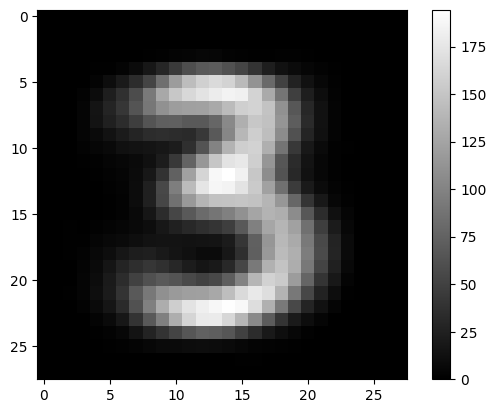

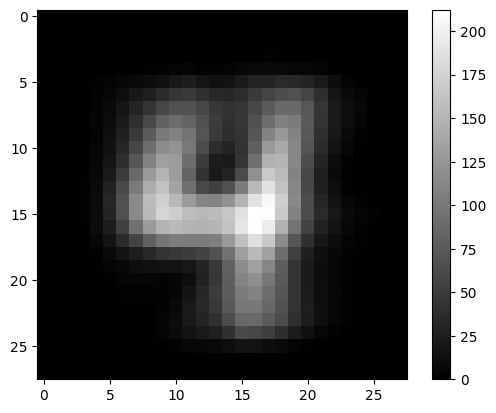

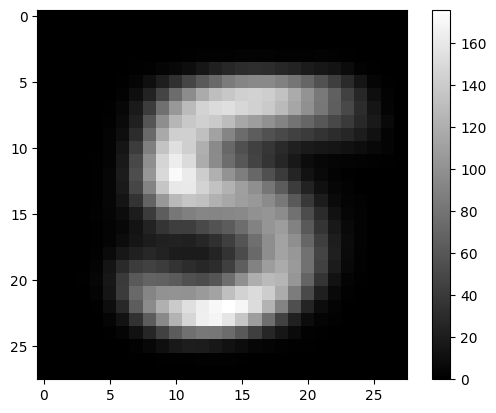

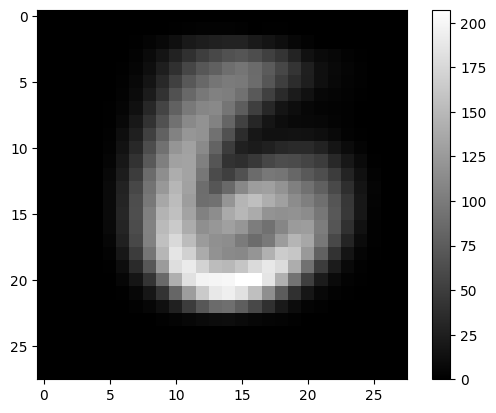

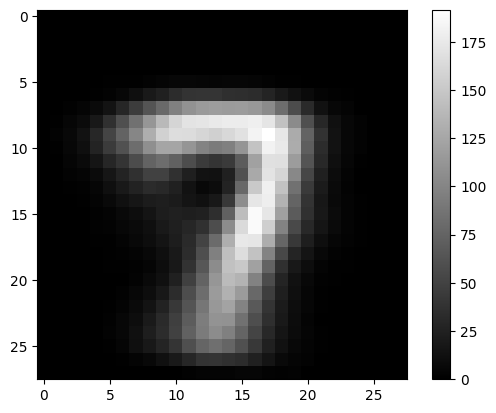

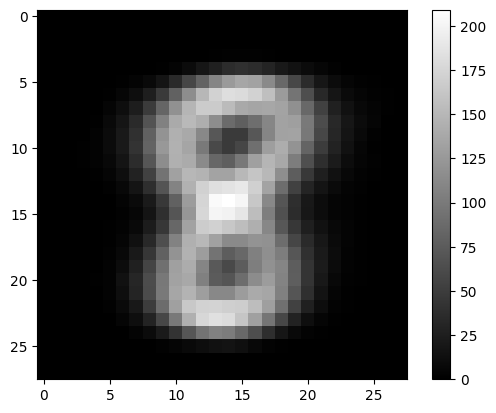

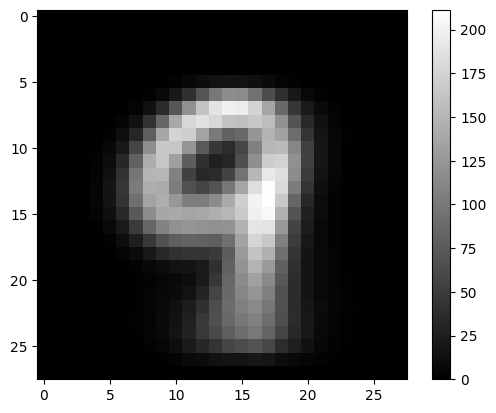

In [63]:
#Q4-3
#implement class mean prototype
zero_digit_class = []
one_digit_class = []
two_digit_class = []
three_digit_class = []
four_digit_class = []
five_digit_class = []
six_digit_class = []
seven_digit_class = []
eight_digit_class = []
nine_digit_class = []
for i in range(6000):
  if (y_train[i] == 0):
    zero_digit_class.append(X_train[i])
  if (y_train[i] == 1):
    one_digit_class.append(X_train[i])
  if (y_train[i] == 2):
    two_digit_class.append(X_train[i])
  if (y_train[i] == 3):
    three_digit_class.append(X_train[i])
  if (y_train[i] == 4):
    four_digit_class.append(X_train[i])
  if (y_train[i] == 5):
    five_digit_class.append(X_train[i])
  if (y_train[i] == 6):
    six_digit_class.append(X_train[i])
  if (y_train[i] == 7):
    seven_digit_class.append(X_train[i])
  if (y_train[i] == 8):
    eight_digit_class.append(X_train[i])
  if (y_train[i] == 9):
    nine_digit_class.append(X_train[i])
class_mean_prot_list = []
class_mean_prot_list.append(np.mean(zero_digit_class,axis=0))
class_mean_prot_list.append(np.mean(one_digit_class,axis=0))
class_mean_prot_list.append(np.mean(two_digit_class,axis=0))
class_mean_prot_list.append(np.mean(three_digit_class,axis=0))
class_mean_prot_list.append(np.mean(four_digit_class,axis=0))
class_mean_prot_list.append(np.mean(five_digit_class,axis=0))
class_mean_prot_list.append(np.mean(six_digit_class,axis=0))
class_mean_prot_list.append(np.mean(seven_digit_class,axis=0))
class_mean_prot_list.append(np.mean(eight_digit_class,axis=0))
class_mean_prot_list.append(np.mean(nine_digit_class,axis=0))
for i in range(10):
  image_data = class_mean_prot_list[i]
  # Reshape the 1D array to 2D (28x28 pixels)
  image_2d = image_data.reshape(28, 28)
  # Display the image
  plt.imshow(image_2d, cmap='gray')  # Use grayscale color map for better visualization of MNIST images
  plt.colorbar()  # Optionally, add a color bar to see the intensity scale
  plt.show()

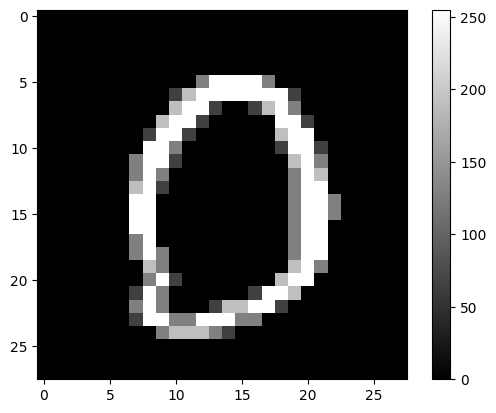

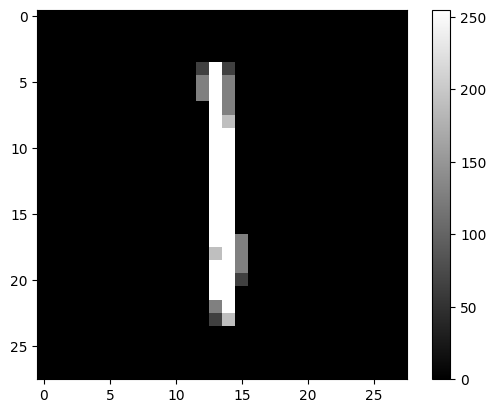

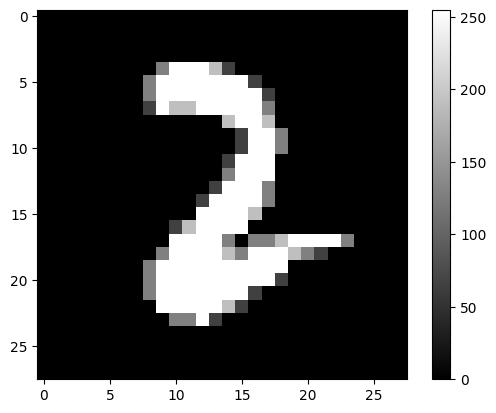

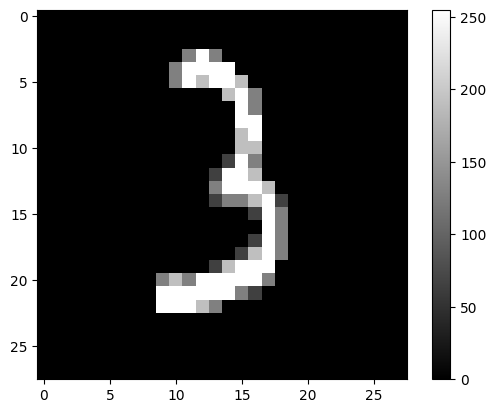

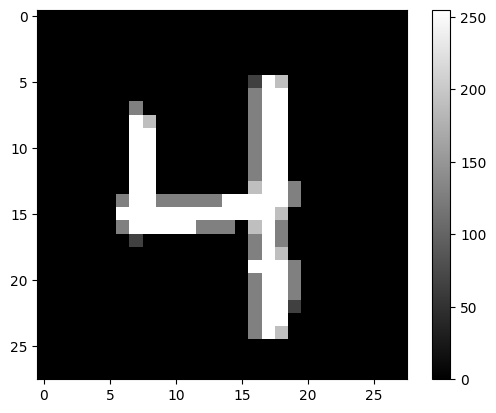

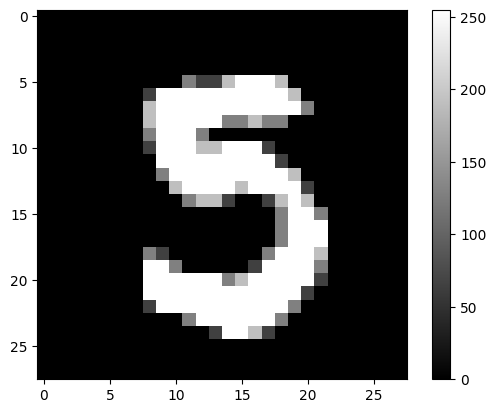

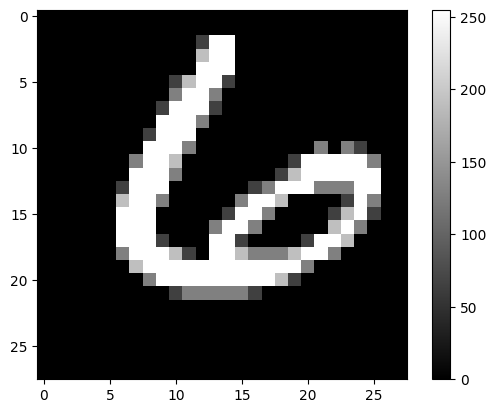

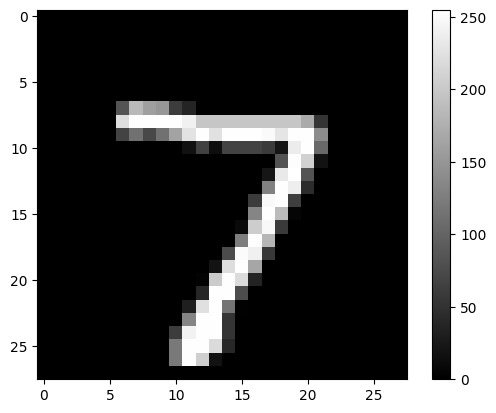

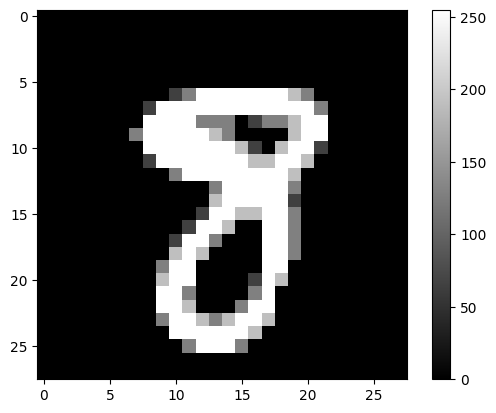

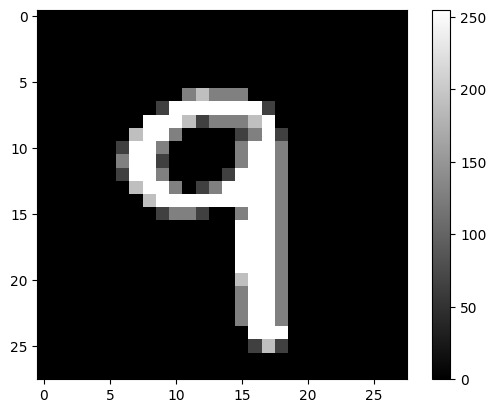

Verify by looking at the actual shape for the first element of X_train:


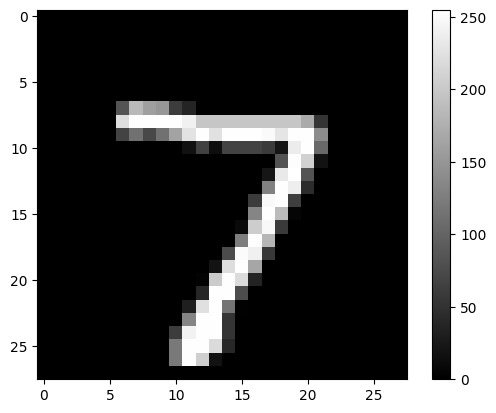

In [64]:
#Q4-3
#implement class NN prototype
# def nearest_neighbor_class(X_train,y_train,X_val_data_point=None):
#     dist_array = np.array([])
#     if X_val_data_point is not None:
#       x = X_val_data_point
#     else:
#       x = X_train[0]
#     # for i in range(1,len(X_train)):
#     #   difference = x - X_train[i]
#     #   distance = np.sqrt(np.sum(difference**2))
#     #   dist_array = np.append(dist_array, distance)
#     # min_index = np.argmin(dist_array)
#     # return min_index, y_train[min_index];
#     distances = np.sqrt(((X_train - x) ** 2).sum(axis=1))
#     min_index = np.argmin(distances)
#     return min_index, y_train[min_index];
def find_nn_for_each_class(test_sample, X_train_flat, y_train):
  """
  Find the nearest neighbor in X_train for each class in the MNIST dataset.

  Parameters:
  - test_sample: A single test sample (flattened image).
  - X_train_flat: Training set images, flattened.
  - y_train: Training set labels.

  Returns:
  - A dictionary with class labels as keys and indices of the nearest neighbor in X_train as values.
  """
  nn_indices = {}
  for class_label in np.unique(y_train):
      # Filter X_train for the current class
      class_indices = np.where(y_train == class_label)[0]
      class_samples = X_train_flat[class_indices]

      # Compute Euclidean distances from the test sample to each sample in the current class
      distances = np.sqrt(np.sum((class_samples - test_sample) ** 2, axis=1))

      # Find the index of the nearest neighbor in the class
      nn_idx = class_indices[np.argmin(distances)]

      # Store the index of the nearest neighbor
      nn_indices[class_label] = nn_idx
  return nn_indices
# prot_index, label = nearest_neighbor_class(X_train, y_train)
NN_indices = find_nn_for_each_class(X_train[0],X_train, y_train)
for class_label, nn_index in NN_indices.items():
  image_data = X_train[nn_index]
  image_2d = image_data.reshape(28, 28)
  plt.imshow(image_2d, cmap='gray')  # Use grayscale color map for better visualization of MNIST images
  plt.colorbar()  # Optionally, add a color bar to see the intensity scale
  plt.show()

print("Verify by looking at the actual shape for the first element of X_train:")
image_data = X_train[0]
image_2d = image_data.reshape(28, 28)
plt.imshow(image_2d, cmap='gray')  # Use grayscale color map for better visualization of MNIST images
plt.colorbar()  # Optionally, add a color bar to see the intensity scale
plt.show()

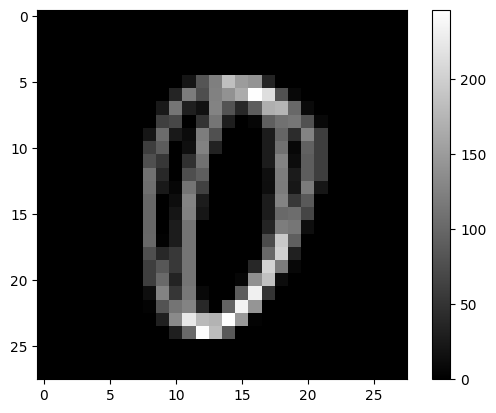

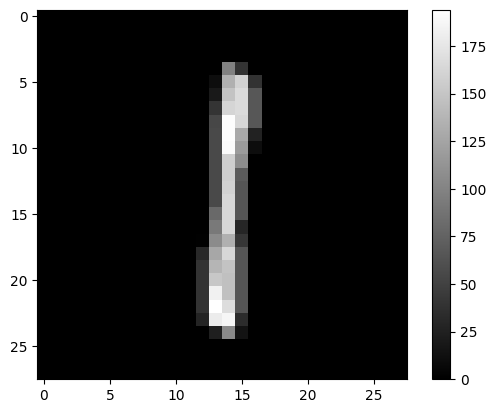

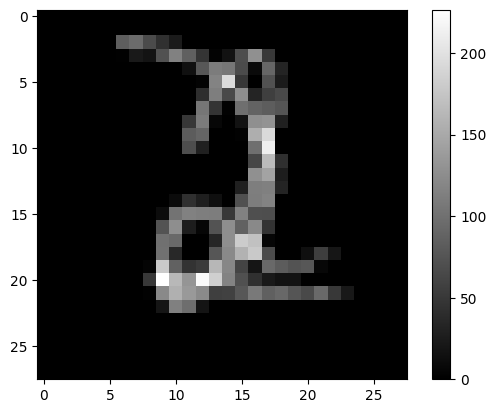

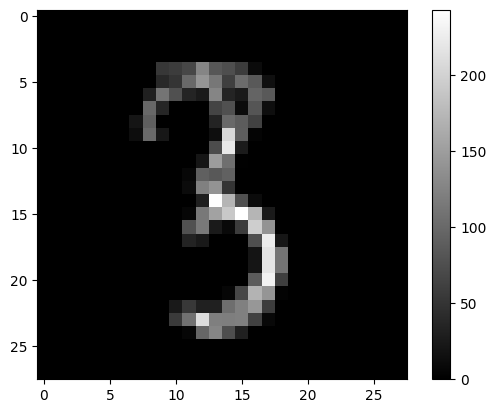

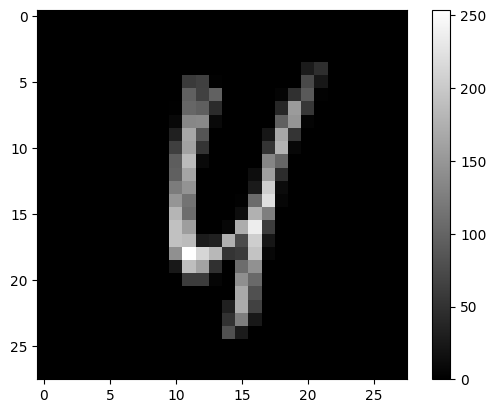

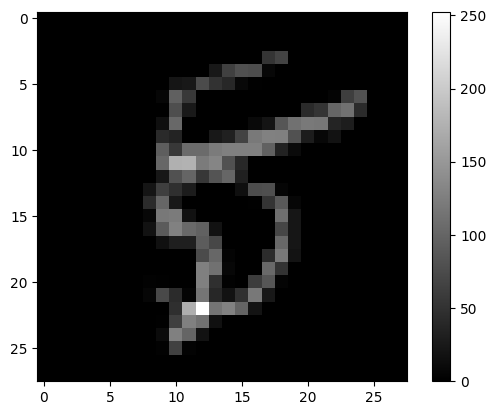

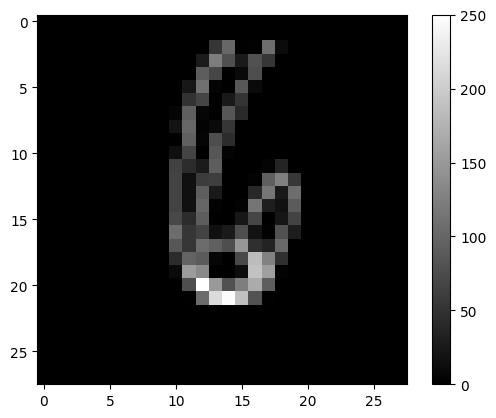

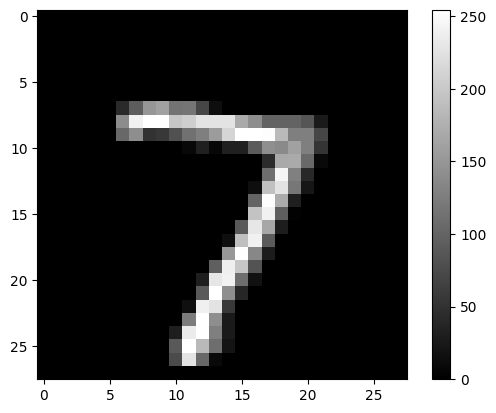

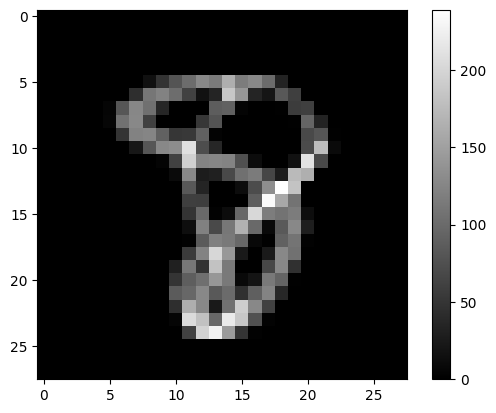

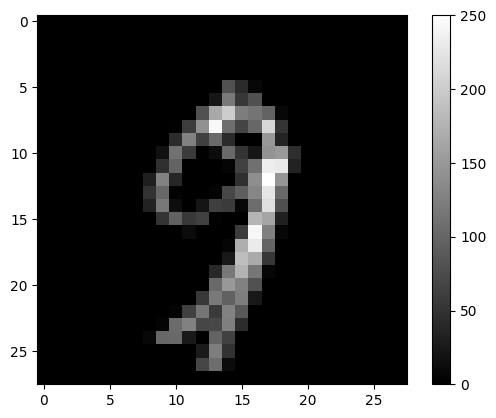

In [65]:
#Q4-3
#implement class kNN prototype
def find_kNN_mean_prototypes(test_point, X_train_flat, y_train, k):
    """
    Find k nearest neighbors for each class in the MNIST dataset based on a given test point.

    Parameters:
    - test_point: A single test sample (flattened).
    - X_train_flat: Training set images, flattened.
    - y_train: Training set labels.
    - k: Number of nearest neighbors to consider for each class.

    Returns:
    - A dictionary with class labels as keys and the indices of the k nearest neighbors as values.
    """
    class_knn_means = {}
    distances = np.linalg.norm(X_train_flat - test_point, axis=1)
    for class_label in np.unique(y_train):
           # Find indices of the current class
        class_indices = np.where(y_train == class_label)[0]
        # Filter distances for the current class and get indices of k smallest distances
        class_distances = distances[class_indices]
        knn_indices = np.argsort(class_distances)[:k]

        # Compute the mean of the k nearest neighbors
        knn_mean = np.mean(X_train_flat[class_indices[knn_indices]], axis=0)

        class_knn_means[class_label] = knn_mean
    return class_knn_means
kNN_indices = find_kNN_mean_prototypes(X_train[0],X_train, y_train,k=2)
# print(kNN_indices)
for class_label, prot in kNN_indices.items():
  # image_data = X_train[nn_index]
  image_2d = prot.reshape(28, 28)
  plt.imshow(image_2d, cmap='gray')  # Use grayscale color map for better visualization of MNIST images
  plt.colorbar()  # Optionally, add a color bar to see the intensity scale
  plt.show()


In [66]:
#Q3-4
from scipy.spatial.distance import cdist
#classifier 1: implement euclidean mean classifer
def euclidean_mean_classifier(X_dataset,X_train_class_dataset):
   class_mean_prot_list = []
   for i in range(10):
    class_mean_prot_list.append(np.mean(X_train_class_dataset[i],axis=0))
   y_label_from_classifier = np.array([])
   for row in X_dataset:
    dist_array = np.array([])
    for j in range(10):
      difference = row - class_mean_prot_list[j]
      distance = np.sqrt(np.sum(difference**2))
      dist_array = np.append(dist_array,distance)
    min_index = np.argmin(dist_array)
    # prot = class_data[min_index]
    y_label_from_classifier = np.append(y_label_from_classifier,min_index)
   return y_label_from_classifier
#classifier 2: implement euclidean NN classifer
def euclidean_NN_classifier(X_val,X_train,y_train):
   y_label_from_classifier = np.array([])
   for row in X_val:
      NN_indices = find_nn_for_each_class(X_train[0],X_train, y_train)
      prototypes = np.array([X_train[NN_indices[class_label]] for class_label in sorted(NN_indices)])
      # Compute distances from the test point to each prototype
      distances = np.sqrt(np.sum((prototypes - row) ** 2, axis=1))
      # Find the index (and thus class) of the nearest prototype
      predicted_class = np.argmin(distances)
      # prot_index, label = nearest_neighbor_class(X_train=X_train,y_train=y_train,X_val_data_point=row)
      y_label_from_classifier = np.append(y_label_from_classifier,predicted_class)
   return y_label_from_classifier
#classifier 3: implement euclidean kNN classifer for k = 3
def euclidean_kNN_classifier(X_val,X_train,y_train,k):
   y_label_from_classifier = np.array([])
   for row in X_val:
    kNN_mean_prototypes = find_kNN_mean_prototypes(X_train[0],X_train, y_train,k)
    distances = {class_label: np.linalg.norm(proto - row) for class_label, proto in kNN_mean_prototypes.items()}
    # Find the class label of the closest prototype
    closest_class = min(distances, key=distances.get)
    y_label_from_classifier = np.append(y_label_from_classifier,closest_class)
   return y_label_from_classifier


In [67]:
#Q3-5
from sklearn.metrics import accuracy_score
import time
X_train_class_datasets = [zero_digit_class,one_digit_class,two_digit_class,three_digit_class,four_digit_class,five_digit_class,six_digit_class,seven_digit_class,eight_digit_class,nine_digit_class]
#validate classifier 1
start_time = time.time()
y_label_from_eucl_mean_classifier = euclidean_mean_classifier(X_val, X_train_class_datasets)
end_time = time.time()
classifier_1_val_runtime = end_time - start_time

#validate classifier 2
start_time = time.time()
y_label_from_eucl_NN_classifier = euclidean_NN_classifier(X_val, X_train,y_train)
end_time = time.time()
classifier_2_val_runtime = end_time - start_time

 #validate classifier 3
start_time = time.time()
y_label_from_eucl_kNN_classifier = euclidean_kNN_classifier(X_val,X_train,y_train,3)
end_time = time.time()
classifier_3_val_runtime = end_time - start_time
accuracy_scores = np.array([accuracy_score(y_val, y_label_from_eucl_mean_classifier),
                           accuracy_score(y_val, y_label_from_eucl_NN_classifier),
                           accuracy_score(y_val, y_label_from_eucl_kNN_classifier)
                           ])
validation_run_time = np.array([classifier_1_val_runtime,classifier_2_val_runtime,classifier_3_val_runtime])

print("Accuracy score for euclidean-mean, euclidean-NN and euclidean-kNN:",accuracy_scores)
print("Validation runtime(s) for euclidean-mean, euclidean-NN, and euclidean-kNN:",validation_run_time)

Accuracy score for euclidean-mean, euclidean-NN and euclidean-kNN: [0.806  0.154  0.5075]
Validation runtime(s) for euclidean-mean, euclidean-NN, and euclidean-kNN: [ 0.45737863 14.79701614 66.46903038]


Accuracy score:  0.816
Validation runtime(s)  0.6936266422271729


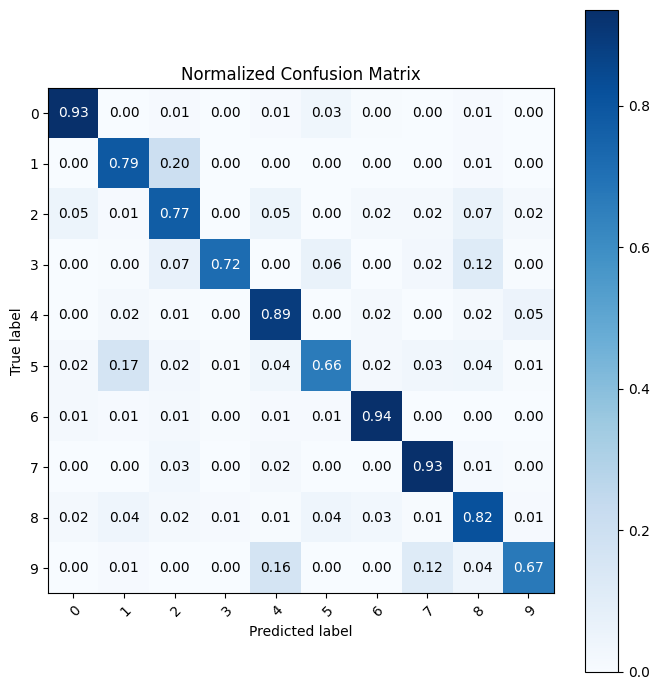

In [68]:
from sklearn.metrics import confusion_matrix
start_time = time.time()
y_test_label_from_eucl_mean_classifier = euclidean_mean_classifier(X_test, X_train_class_datasets)
end_time = time.time()
runtime = end_time - start_time
test_accuracy_score = accuracy_score(y_test, y_test_label_from_eucl_mean_classifier)
print("Accuracy score: ",test_accuracy_score)
print("Validation runtime(s) ",runtime)
cm = confusion_matrix(y_test, y_test_label_from_eucl_mean_classifier)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
def plot_normalized_confusion_matrix(cm, class_names):
    """
    Plots a normalized confusion matrix.

    Parameters:
    - cm: The confusion matrix to be plotted.
    - class_names: An array of class names for the given classification problem.
    """
    fig, ax = plt.subplots(figsize=(7, 7))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # Show all ticks and label them with the respective list entries
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title='Normalized Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Assuming class_names are simply class indices for the synthetic example
class_names = [str(i) for i in range(np.max(9) + 1)]

# Plot the normalized confusion matrix
plot_normalized_confusion_matrix(cm_normalized, class_names=class_names)